In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def count_collisions(array1, array2, threshold=3):
    """
    Count number of trajectories that experience at least one collision 
    between corresponding trajectories in array1 and array2.

    Parameters:
        array1: np.ndarray of shape (n_traj, horizon, num_states)
        array2: np.ndarray of shape (n_traj, horizon, num_states)
        threshold: float, distance below which a collision is counted

    Returns:
        num_colliding_trajectories: int
    """
    assert array1.shape == array2.shape, "Arrays must have the same shape"

    # Compute pairwise distances along the trajectory (n_traj, horizon)
    distances = np.linalg.norm(array1 - array2, axis=2)

    # print(distances)

    # Check where distance is below threshold
    collision_mask = distances < threshold  # shape: (n_traj, horizon)

    # Count how many trajectories have at least one collision
    num_colliding_trajectories = np.sum(np.any(collision_mask, axis=1))

    return num_colliding_trajectories

In [4]:
def count_collisions_obstacle(array1, array2, radius=4):
    """
    Count number of trajectories that experience at least one collision 
    between corresponding trajectories in array1 and array2.

    Parameters:
        array1: np.ndarray of shape (n_traj, horizon, num_states)
        array2: np.ndarray of shape (n_traj, horizon, num_states)
        radius: float, distance below which a collision with the obstacle is counted

    Returns:
        num_colliding_trajectories: int
    """
    assert array1.shape == array2.shape, "Arrays must have the same shape"

    collision_count = 0
    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if np.linalg.norm(array1[i][j] - np.array([10, 0])) < radius or \
               np.linalg.norm(array2[i][j] - np.array([10, 0])) < radius:
                collision_count += 1
                break
    
    return collision_count

In [5]:
def count_total_collisions(array1, array2,
                           threshold: float = 3.0,
                           radius: float = 4.0,
                           obstacle_center: np.ndarray = np.array([10.0, 0.0])
                          ) -> int:
    """
    Count number of trajectory-pairs that experience at least one
    collision *either* between array1 and array2 *or* with the obstacle.

    Parameters:
        array1: np.ndarray, shape (n_traj, horizon, num_states)
        array2: np.ndarray, shape (n_traj, horizon, num_states)
        threshold: float, distance below which two agents collide
        radius: float, distance below which an agent collides with obstacle
        obstacle_center: np.ndarray, shape (2,), [x,y] of the obstacle

    Returns:
        total_collisions: int
            number of trajectories where (self-collision ∪ obstacle-collision)
    """
    assert array1.shape == array2.shape, "Arrays must have the same shape"
    n_traj, horizon, num_states = array1.shape

    # 1) self-collision mask: shape (n_traj,)
    dists = np.linalg.norm(array1 - array2, axis=2)        # (n_traj, horizon)
    self_collision = np.any(dists < threshold, axis=1)     # (n_traj,)

    # 2) obstacle-collision mask: shape (n_traj,)
    #    (check only the XY dimensions for obstacle contact)
    pos1 = array1[..., :2]                                 # (n_traj, horizon, 2)
    pos2 = array2[..., :2]                                 # (n_traj, horizon, 2)
    d1 = np.linalg.norm(pos1 - obstacle_center, axis=2)    # (n_traj, horizon)
    d2 = np.linalg.norm(pos2 - obstacle_center, axis=2)    # (n_traj, horizon)
    obs_collision = np.any((d1 < radius) | (d2 < radius), axis=1)

    # 3) union and count
    total_mask = self_collision | obs_collision
    return int(np.sum(total_mask))

In [6]:
# CTDE Diffusion No Final Position

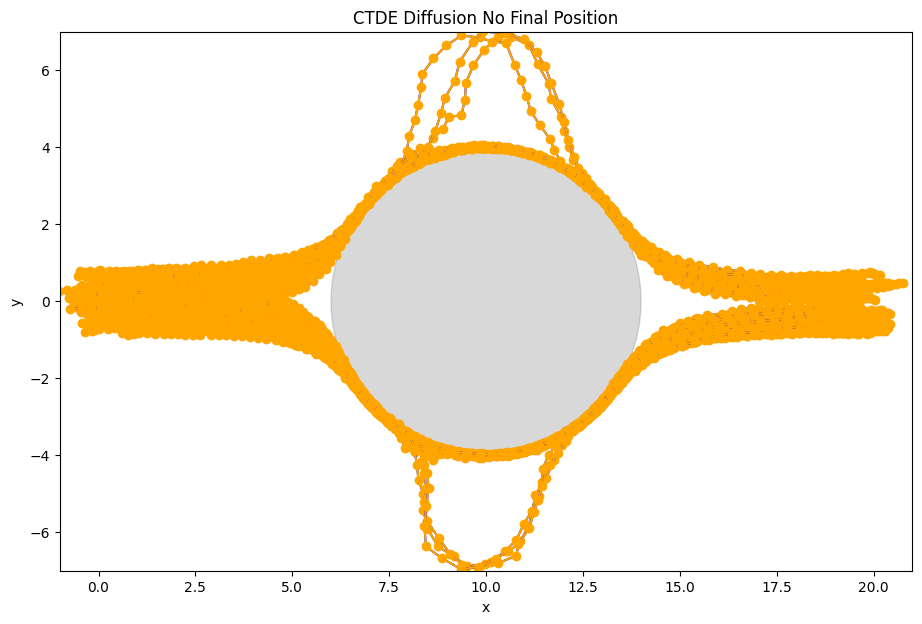

In [317]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion No Final Position")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/ours_seed0/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

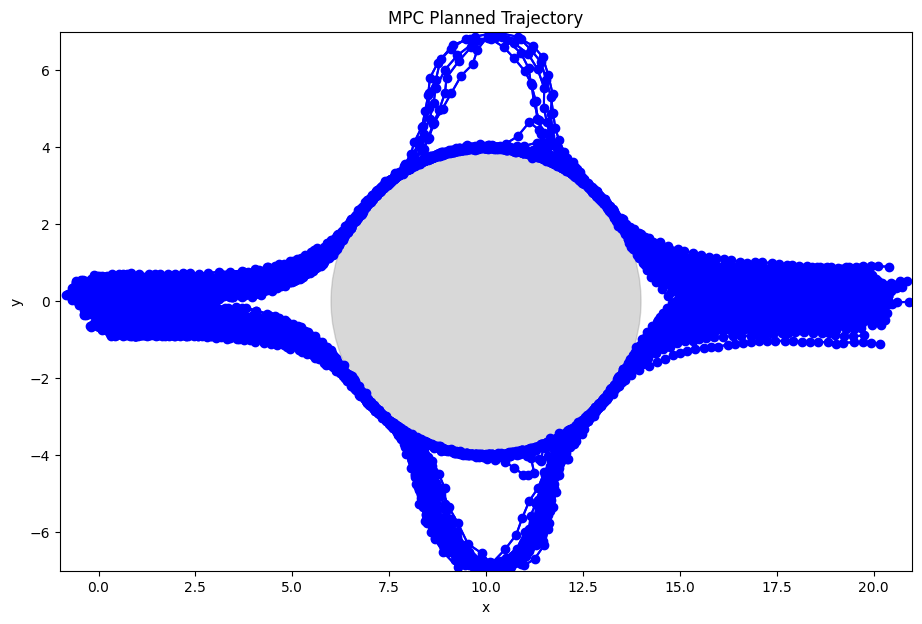

In [318]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/ours_seed0/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

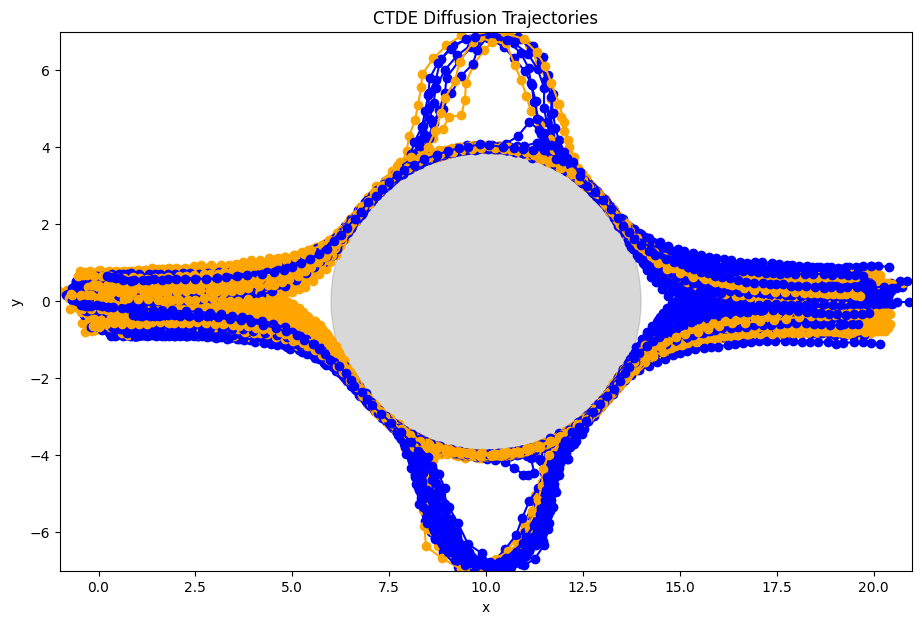

In [319]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [297]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=0.75)

np.int64(8)

In [323]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.7)

0

In [327]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.25, radius=3.9)

11

In [13]:
# Vanilla CTDE Diffusion No Final Position

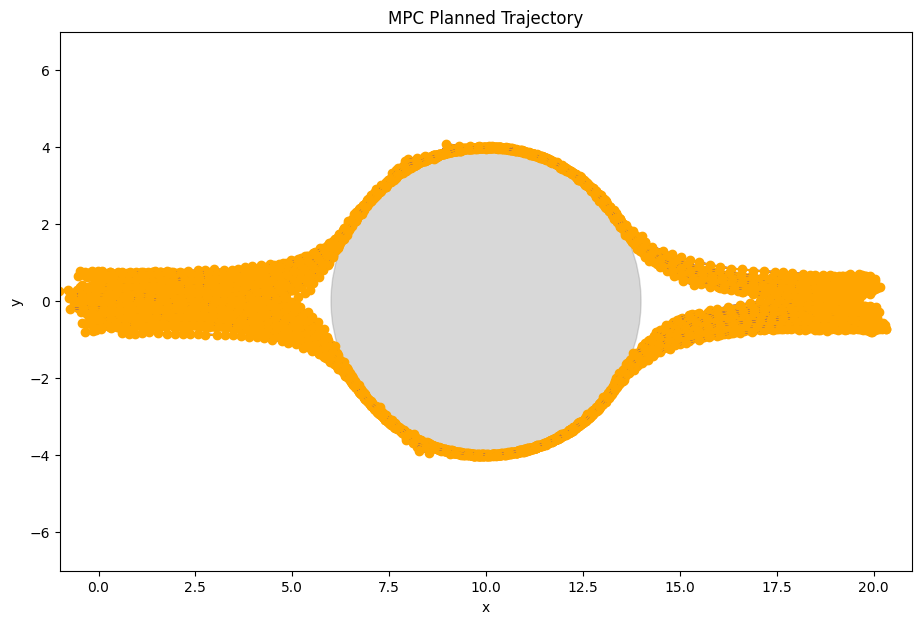

In [328]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/vanillaCTDE_seed0/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

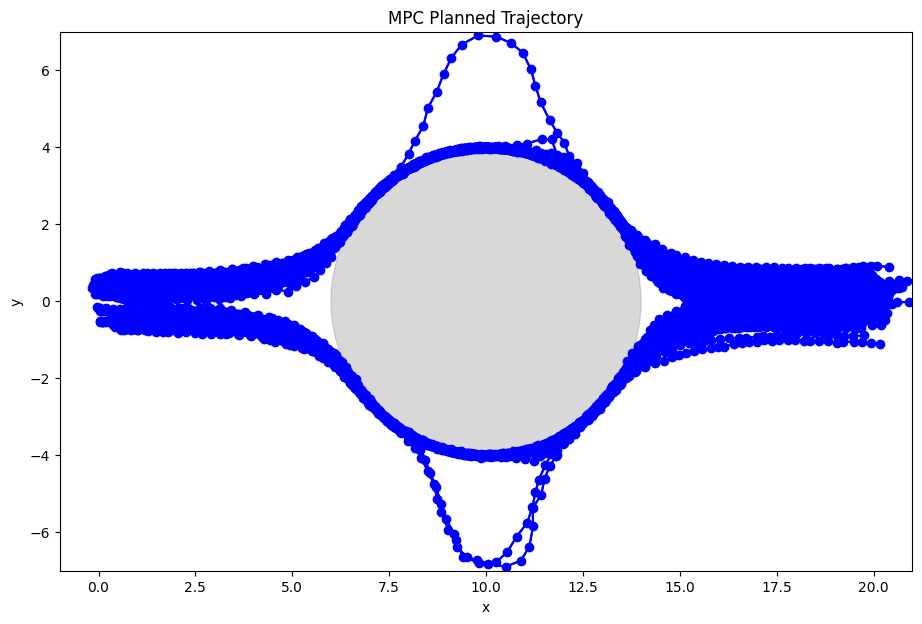

In [329]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/vanillaCTDE_seed0/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

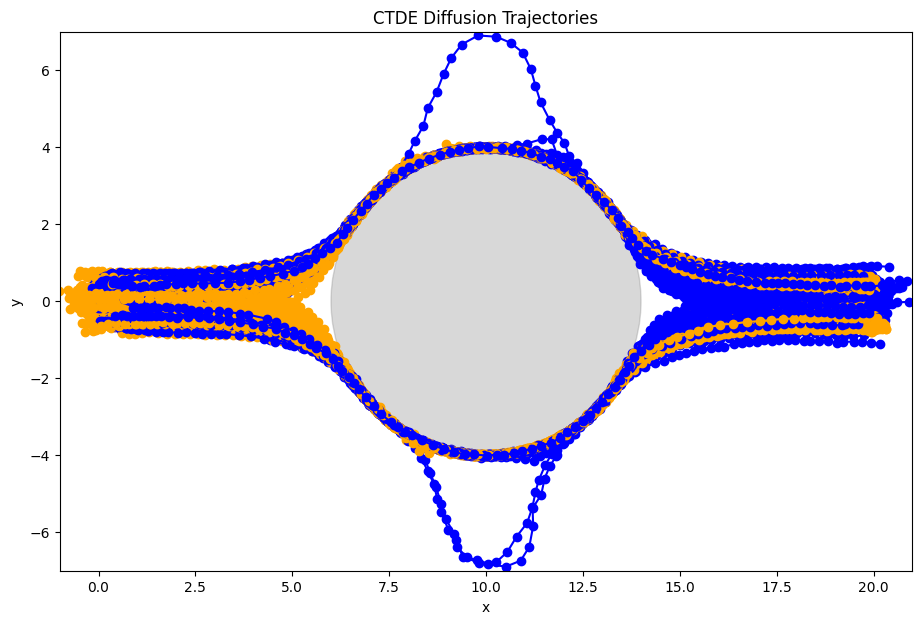

In [330]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [310]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=0.75)

np.int64(49)

In [331]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.9)

1

In [335]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.25, radius=3.9)

51

In [ ]:
# BC Conditioned on Own Current Position and Other's Current Position

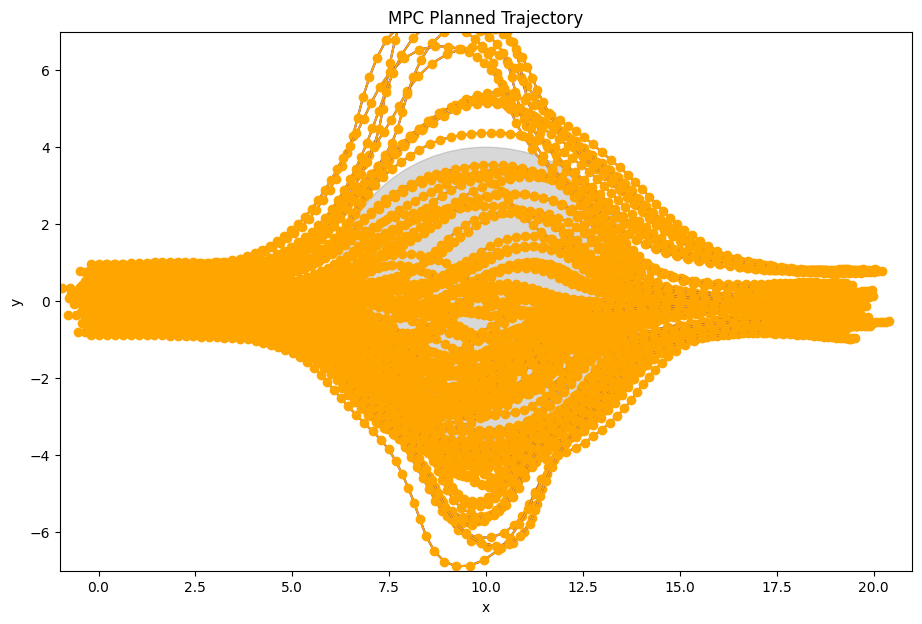

In [341]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_seed0/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

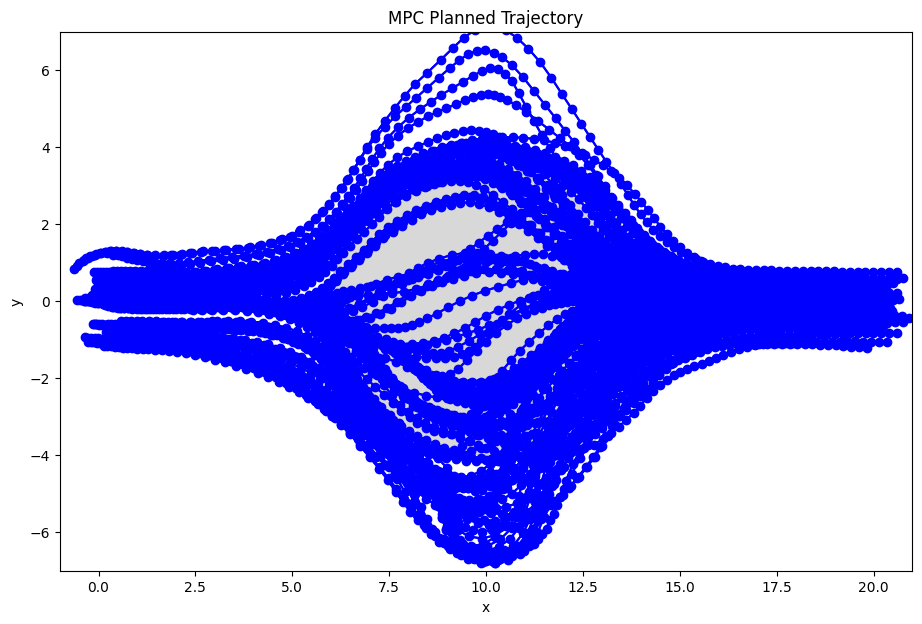

In [342]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_seed0/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

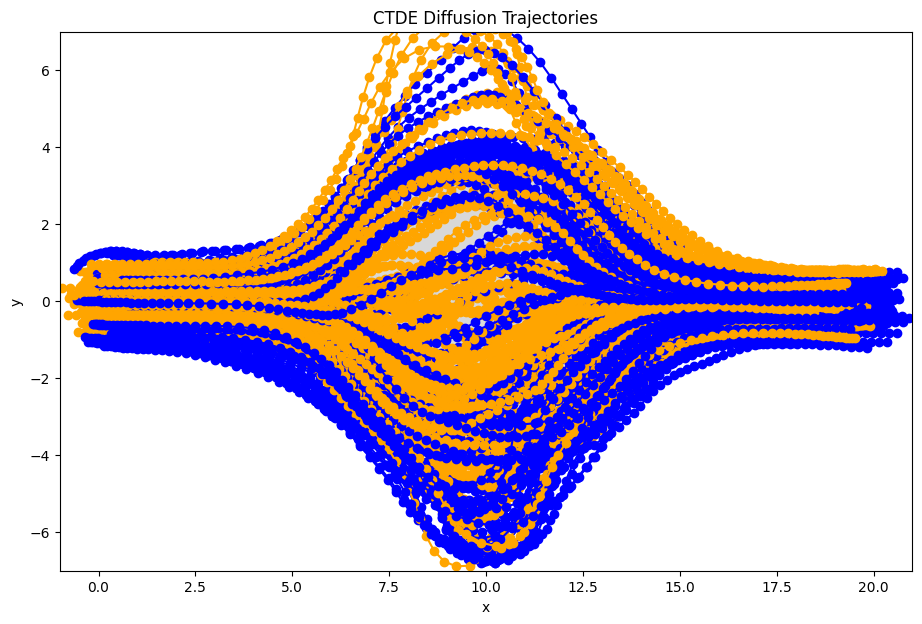

In [343]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [347]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=1.5)

np.int64(7)

In [350]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

92

In [356]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

92

In [ ]:
# MAGAIL Conditioned on Own Current Position and Other's Current Position Vary Initial Position

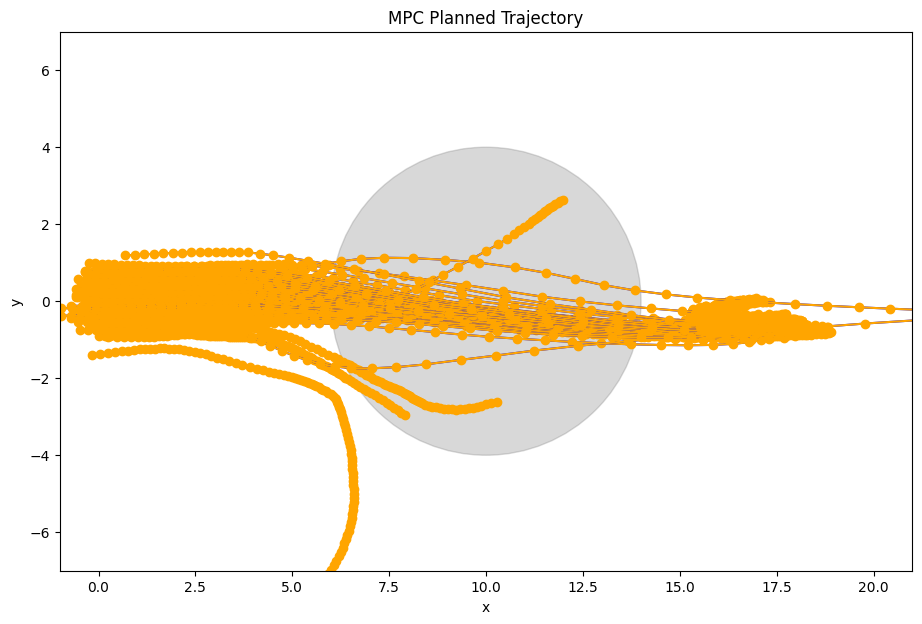

In [357]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_seed0/vary_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

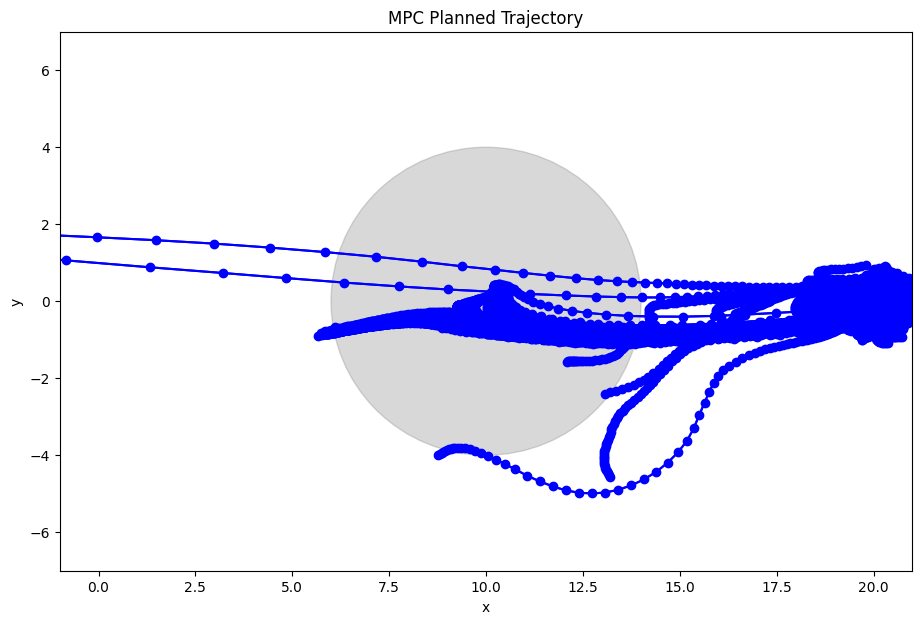

In [358]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_seed0/vary_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

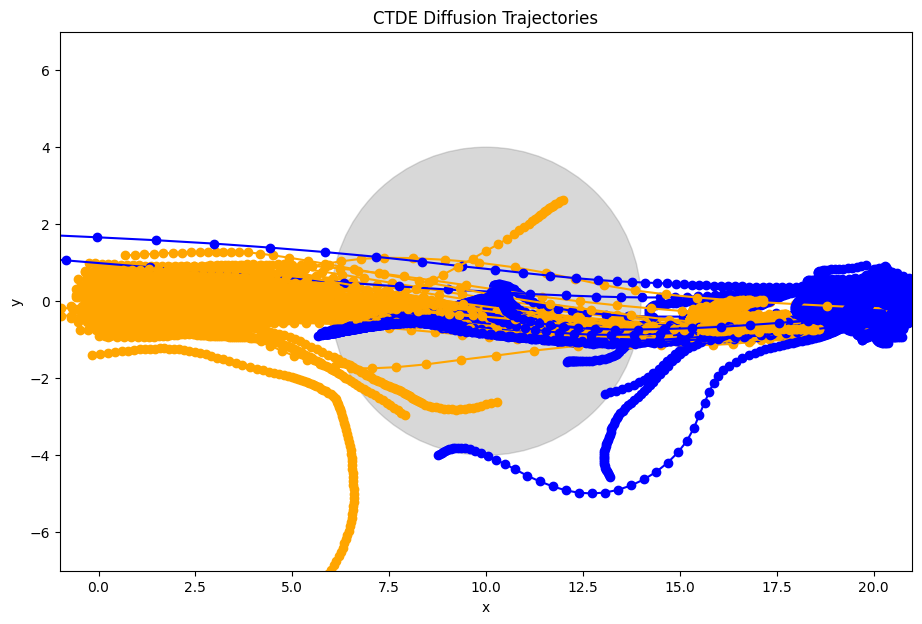

In [359]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [363]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=1.5)

np.int64(95)

In [366]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

98

In [372]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.25, radius=3.9)

99

In [368]:
# MAGAIL Conditioned on Own Current Position and Other's Current Position Static Initial Position

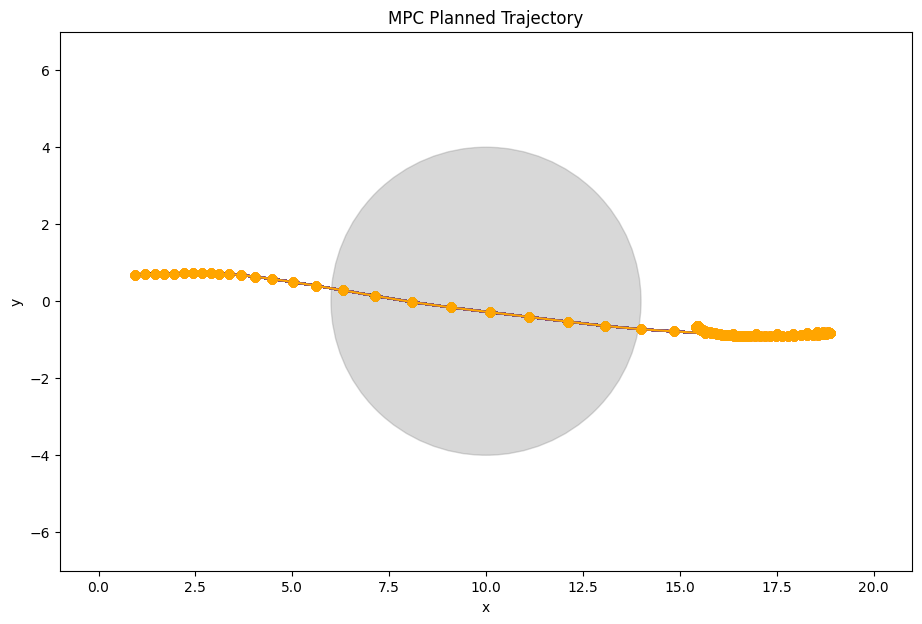

In [373]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_seed0/static_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

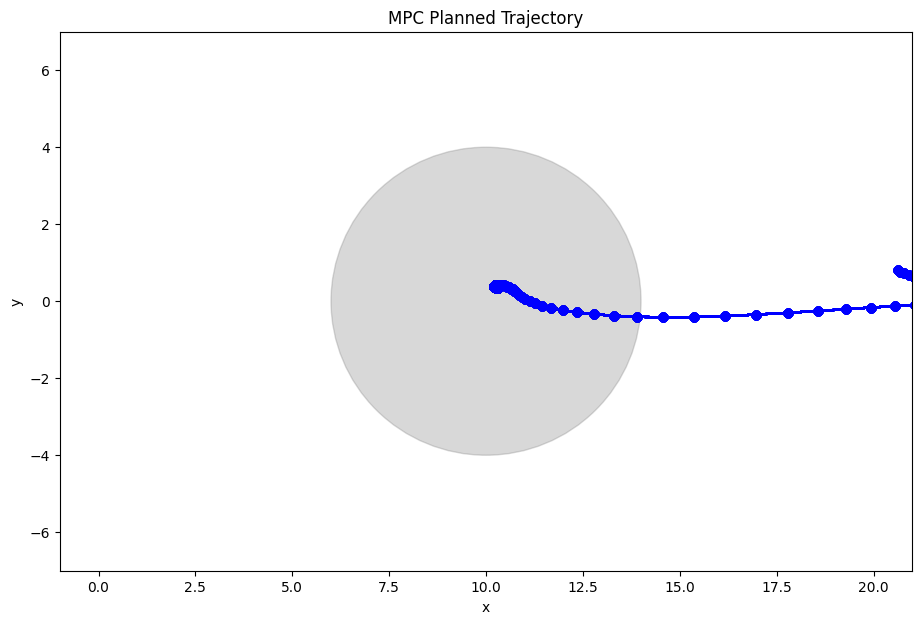

In [374]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_seed0/static_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

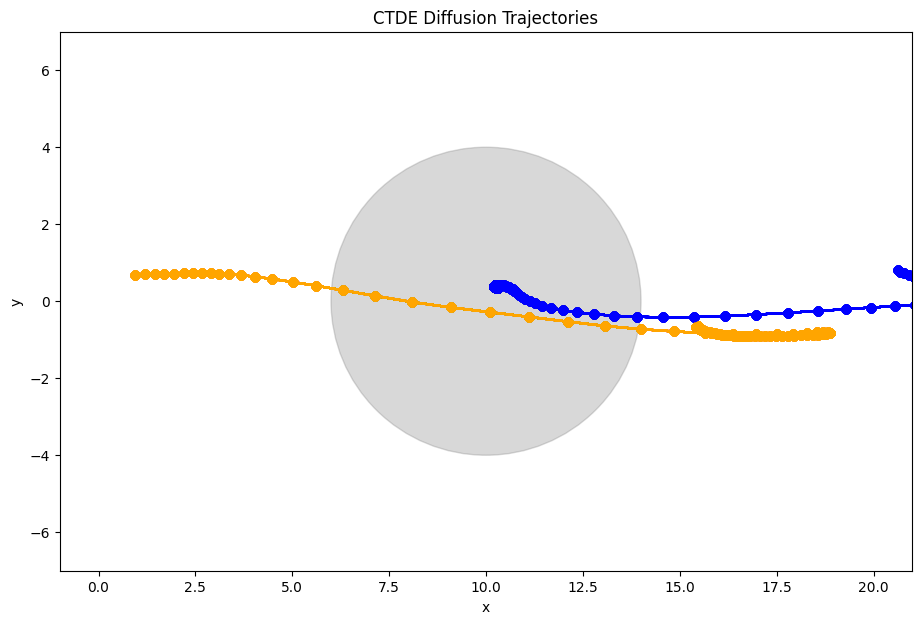

In [375]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [378]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=1.5)

np.int64(100)

In [379]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

100

In [136]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

100

In [229]:
# CTDE Diffusion Extra Info

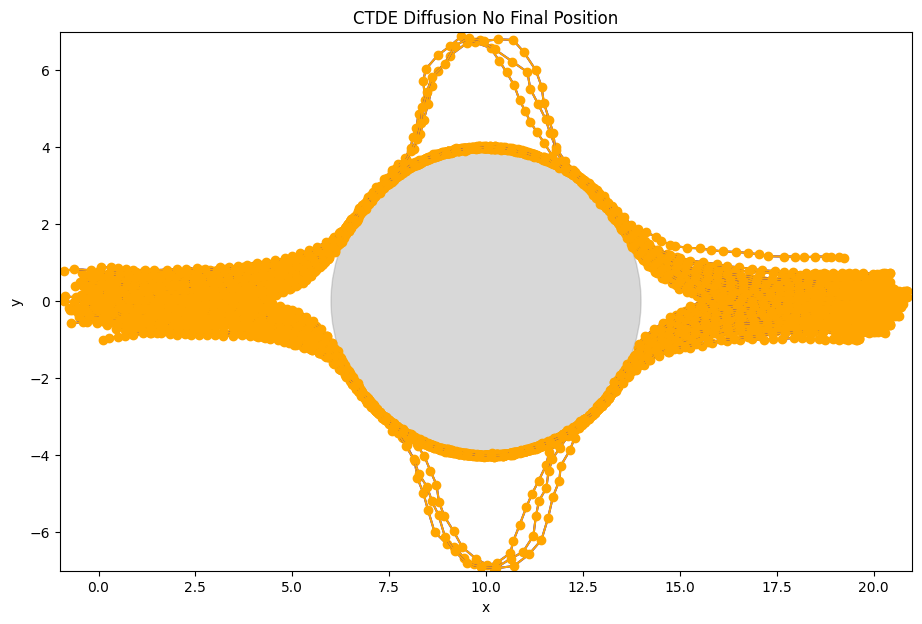

In [380]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion No Final Position")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/ours_extrainfo_seed70/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

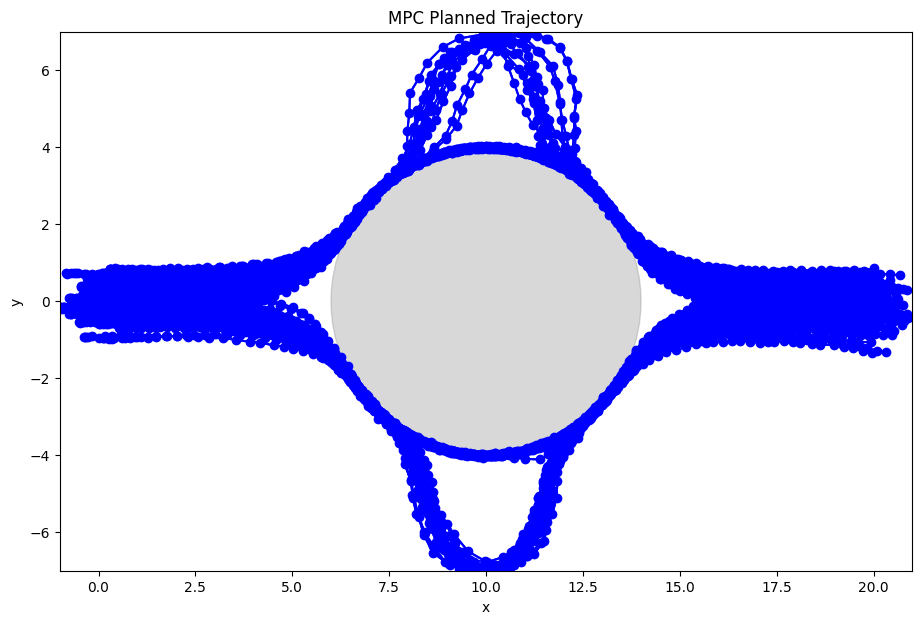

In [381]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/ours_extrainfo_seed70/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

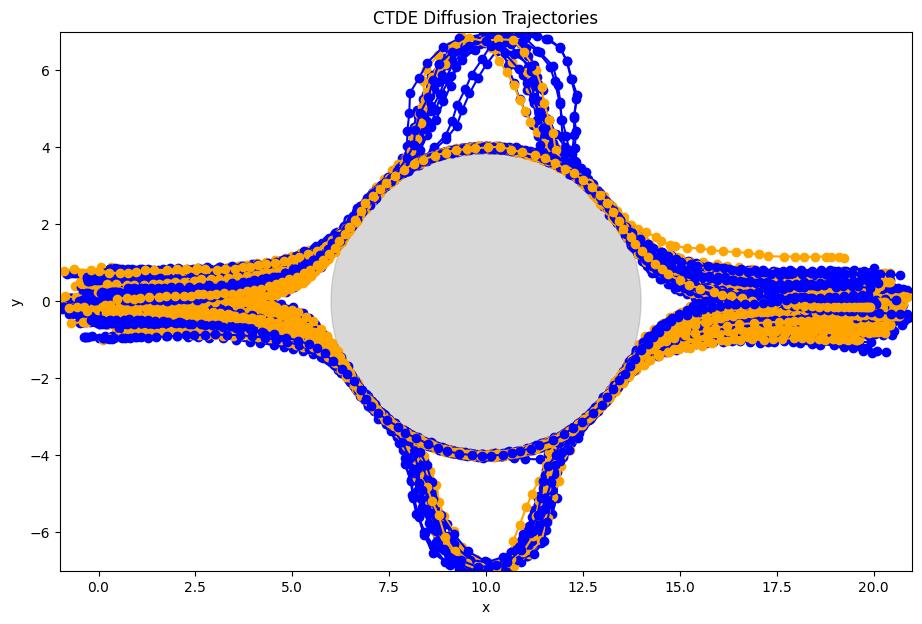

In [382]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [386]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=1.5)

np.int64(12)

In [389]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.99)

100

In [393]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.9)

20

In [244]:
# Vanilla CTDE Diffusion Extra Info

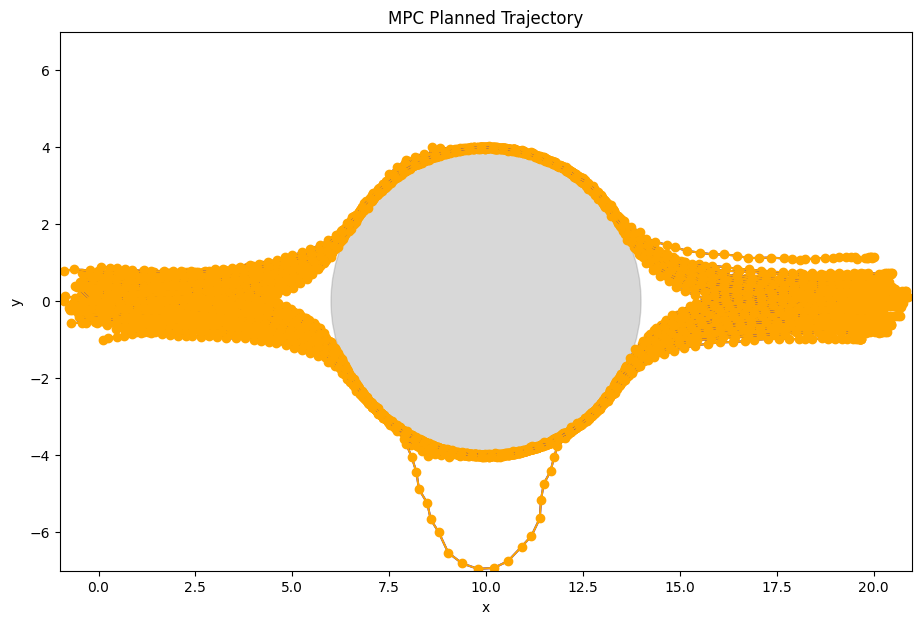

In [394]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/vanillaCTDE_extrainfo_seed70/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

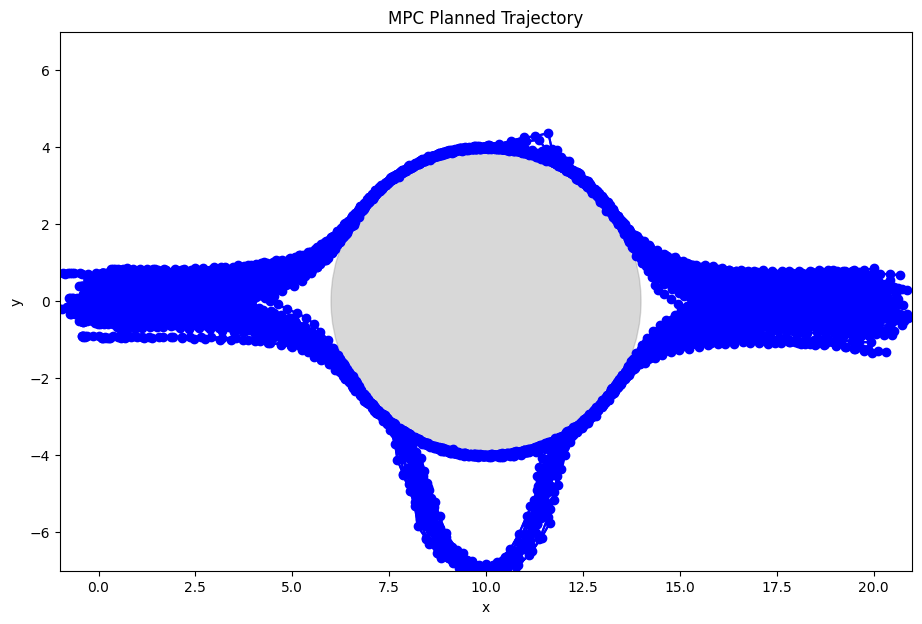

In [395]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/vanillaCTDE_extrainfo_seed70/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

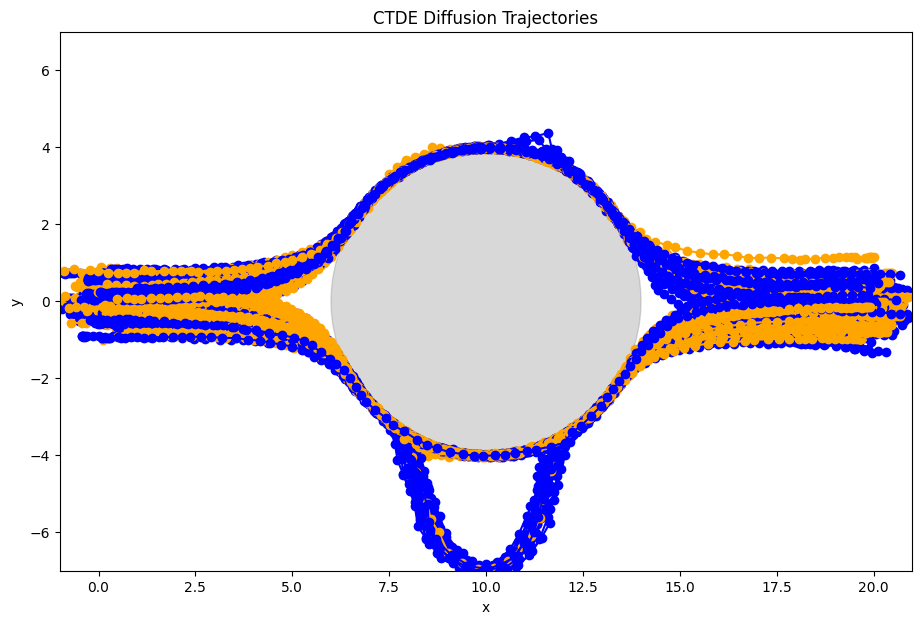

In [396]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [402]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=1.5)

np.int64(38)

In [405]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.99)

100

In [409]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.25, radius=3.6)

41

In [288]:
# BC Extra Info

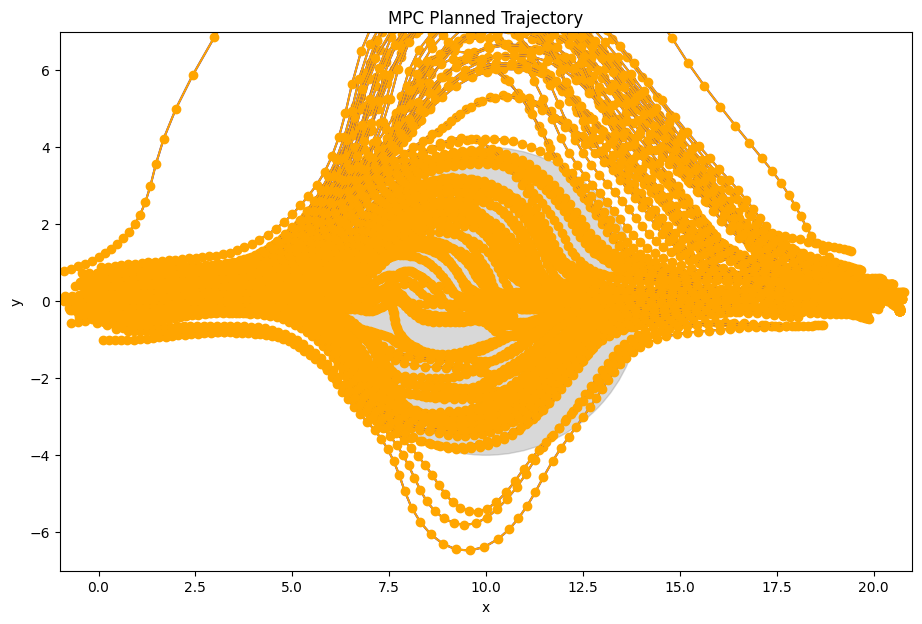

In [410]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_extrainfo_seed70/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

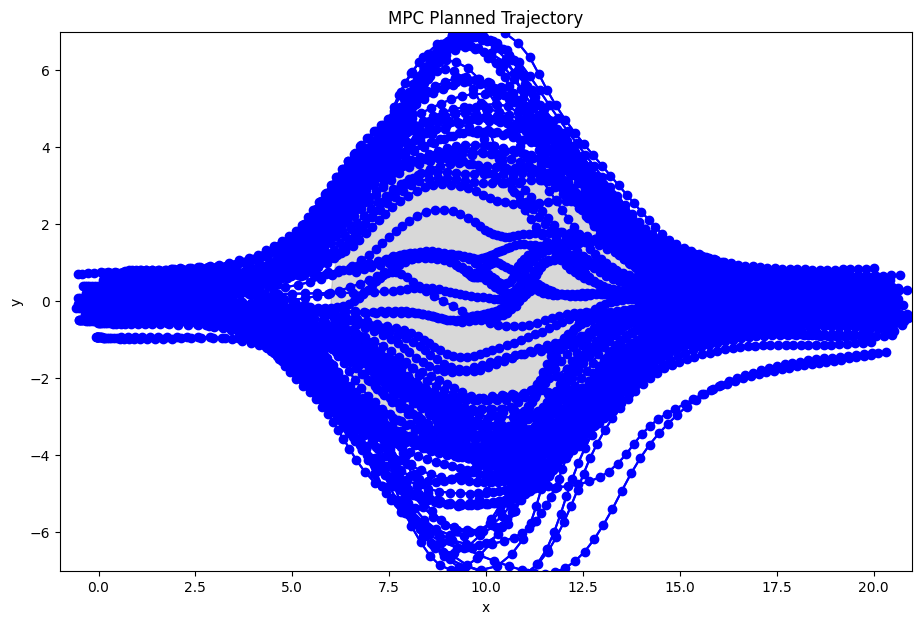

In [411]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_extrainfo_seed70/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

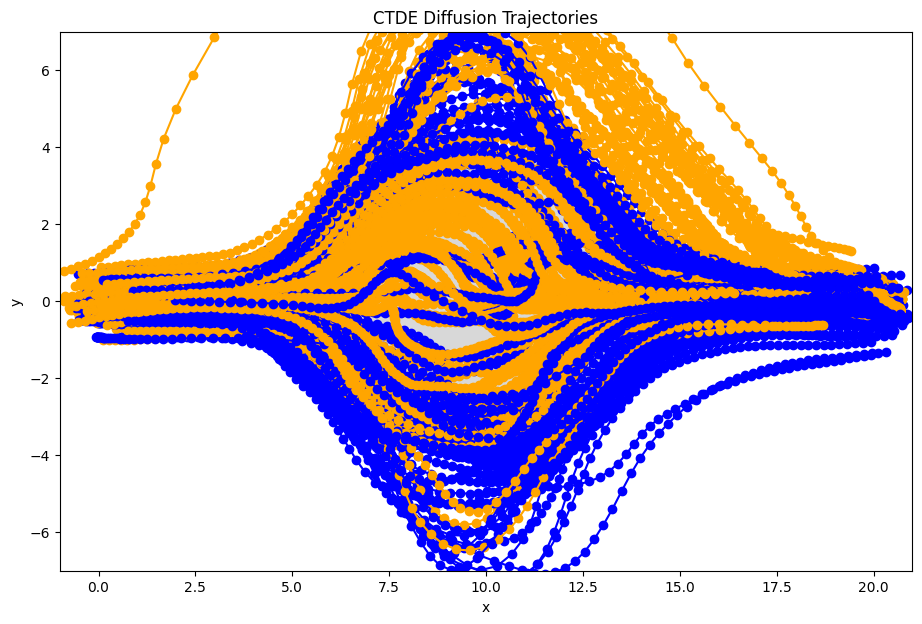

In [412]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [416]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=1.5)

np.int64(4)

In [418]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.9)

100

In [422]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.25, radius=3.6)

100

In [283]:
# MAGAIL Extra Info Vary Initial Position

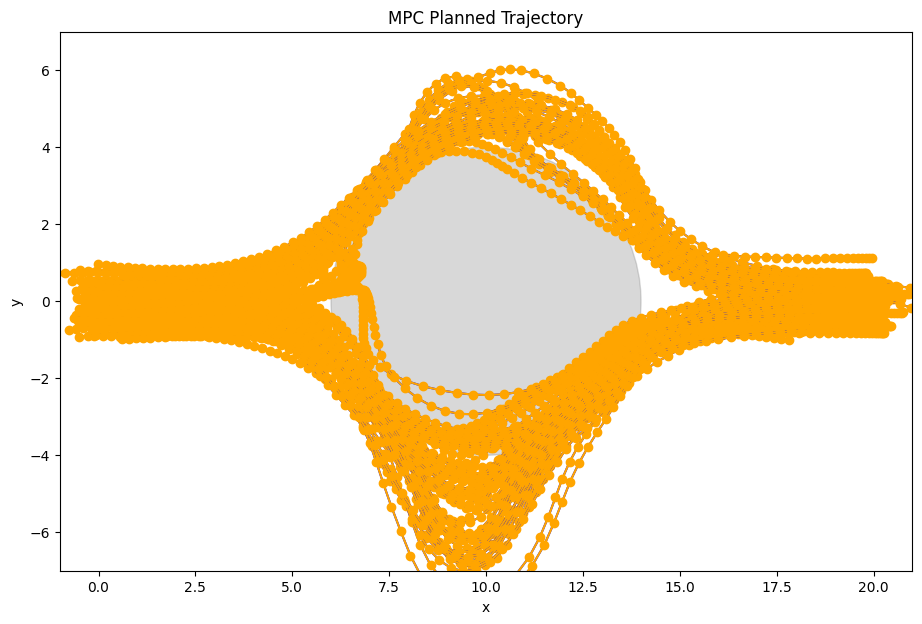

In [423]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_extrainfo_seed70/vary_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

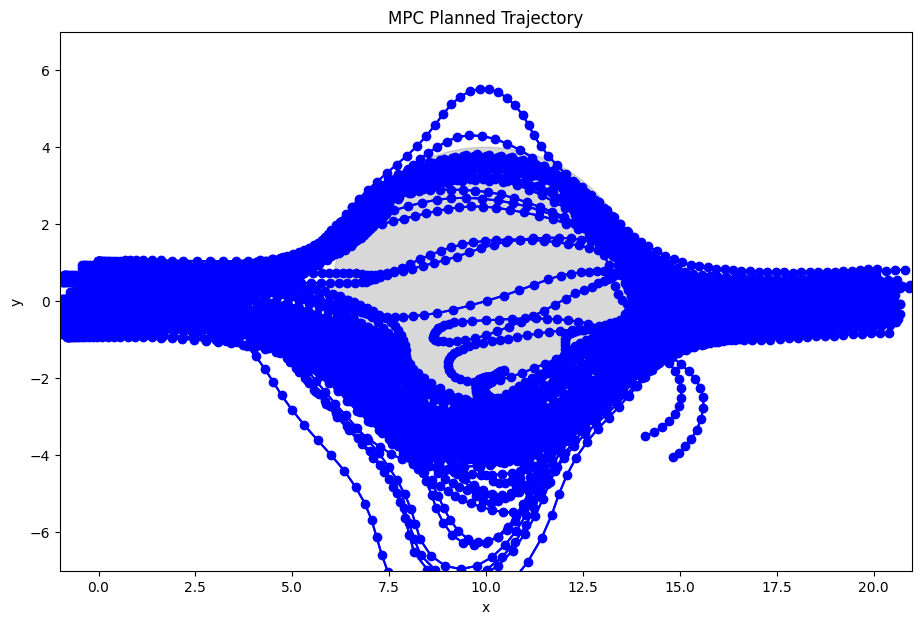

In [424]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_extrainfo_seed70/vary_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

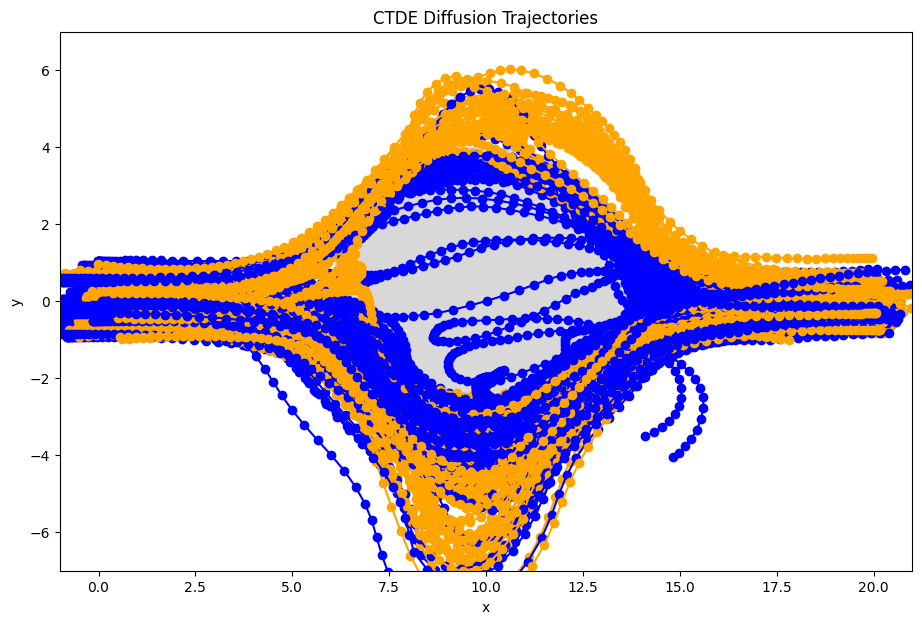

In [425]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [429]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=1.5)

np.int64(20)

In [432]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.99)

97

In [436]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.25, radius=3.6)

74

In [437]:
# MAGAIL Extra Info Static Initial Position

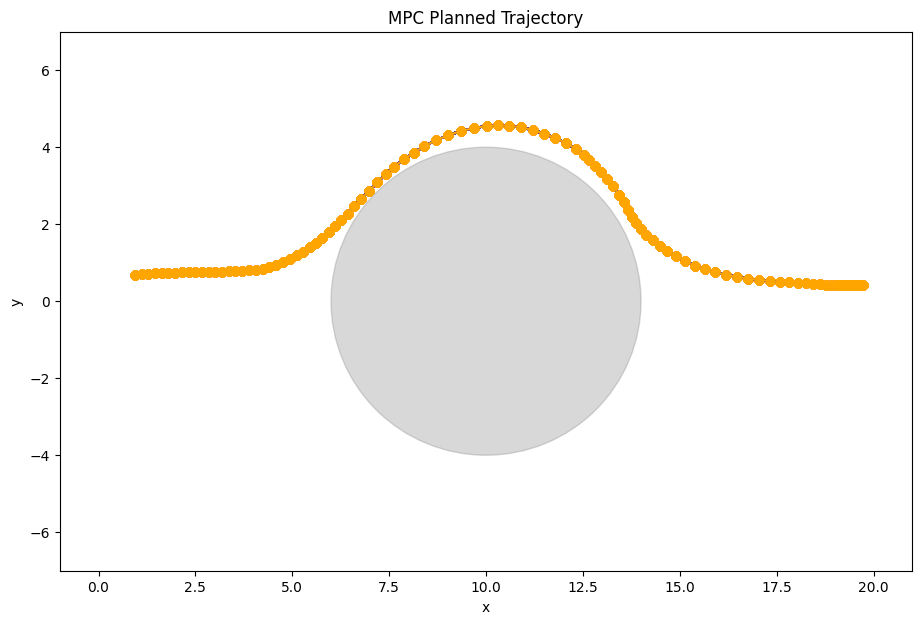

In [438]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_extrainfo_seed70/static_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

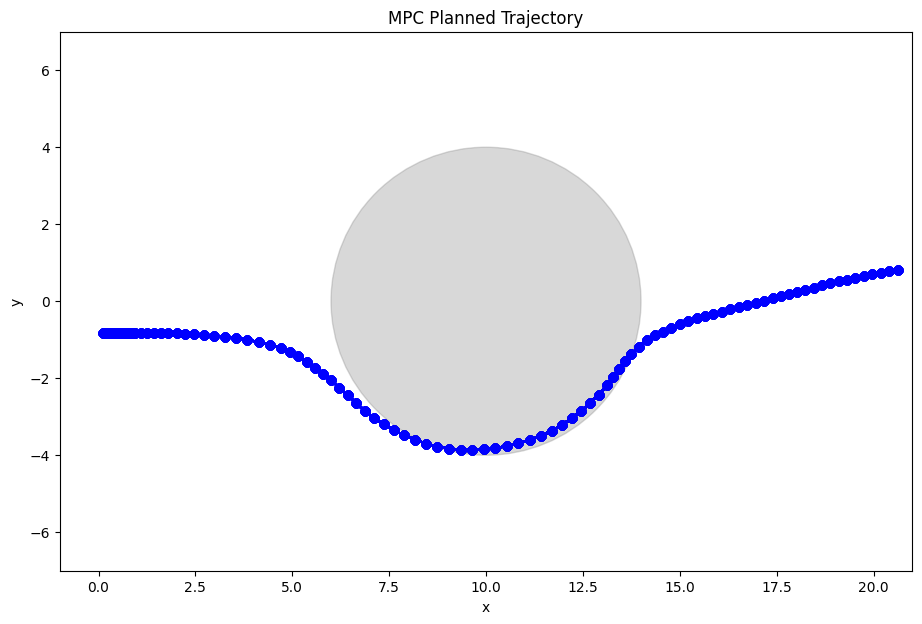

In [440]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_extrainfo_seed70/static_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

In [444]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.99)

np.int64(0)

In [447]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

0

In [451]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

0